In [1]:
%load_ext autoreload
import bpy
import numpy as np
import sys
import clipboard
from collections import defaultdict
from PIL import Image
sys.path.append('/Users/orenm/BlenderShaderProject/project_files/')

In [2]:
import cProfile
import IPython.display as dp
from pstats import Stats

# pip install gprof2dot

def profile(exec_code):
    cProfile.run(exec_code, filename='/tmp/cprof.pstats')
    !gprof2dot -f pstats /tmp/cprof.pstats | dot -Tpng -o /tmp/output.png
    return dp.Image(filename='/tmp/output.png')

In [3]:
import bpy
import sys
sys.path.append('/Users/orenm/BlenderShaderProject/project_files/')

from Logic.bpy_connector import *

clean_scene()
set_for_texture_generation()

Info: Deleted 6 data-block(s)


In [4]:
%autoreload 2
from Logic.bpy_connector import clean_scene, set_for_texture_generation, settings_for_texture_generation, NodesAdder
from Logic.network_manager import NetworkManager, ParamRequestType

In [5]:
path = '/Users/orenm/Desktop/test.png'

In [6]:
clean_scene()
set_for_texture_generation()
settings_for_texture_generation(path = path, resolution=512)

material = bpy.data.materials.new(name='my_material')
material.use_nodes = True
bpy.data.objects['Plane'].data.materials.append(material)
nodes = material.node_tree.nodes
links = material.node_tree.links
[nodes.remove(n) for n in nodes]
node_tree = material.node_tree
nodes_adder = NodesAdder(material.node_tree)

Info: Deleted 2 data-block(s)


In [8]:
nm = NetworkManager()
nm.initialize_network()
node = nm.add_node_by_type('Math')
nm.add_edge(node, 'OutputNode','Value', 'Color')
nm.add_edge('InputNode', node, 'Vector', 'value_0')
nm.add_edge('InputNode', node, 'Vector', 'value_1')

nm.set_nodes_attributes({'Math_1': {'operation': 'ABSOLUTE'}})

In [9]:
code = nm.generate_code(with_initialization=True)

In [10]:
clipboard.copy(code)

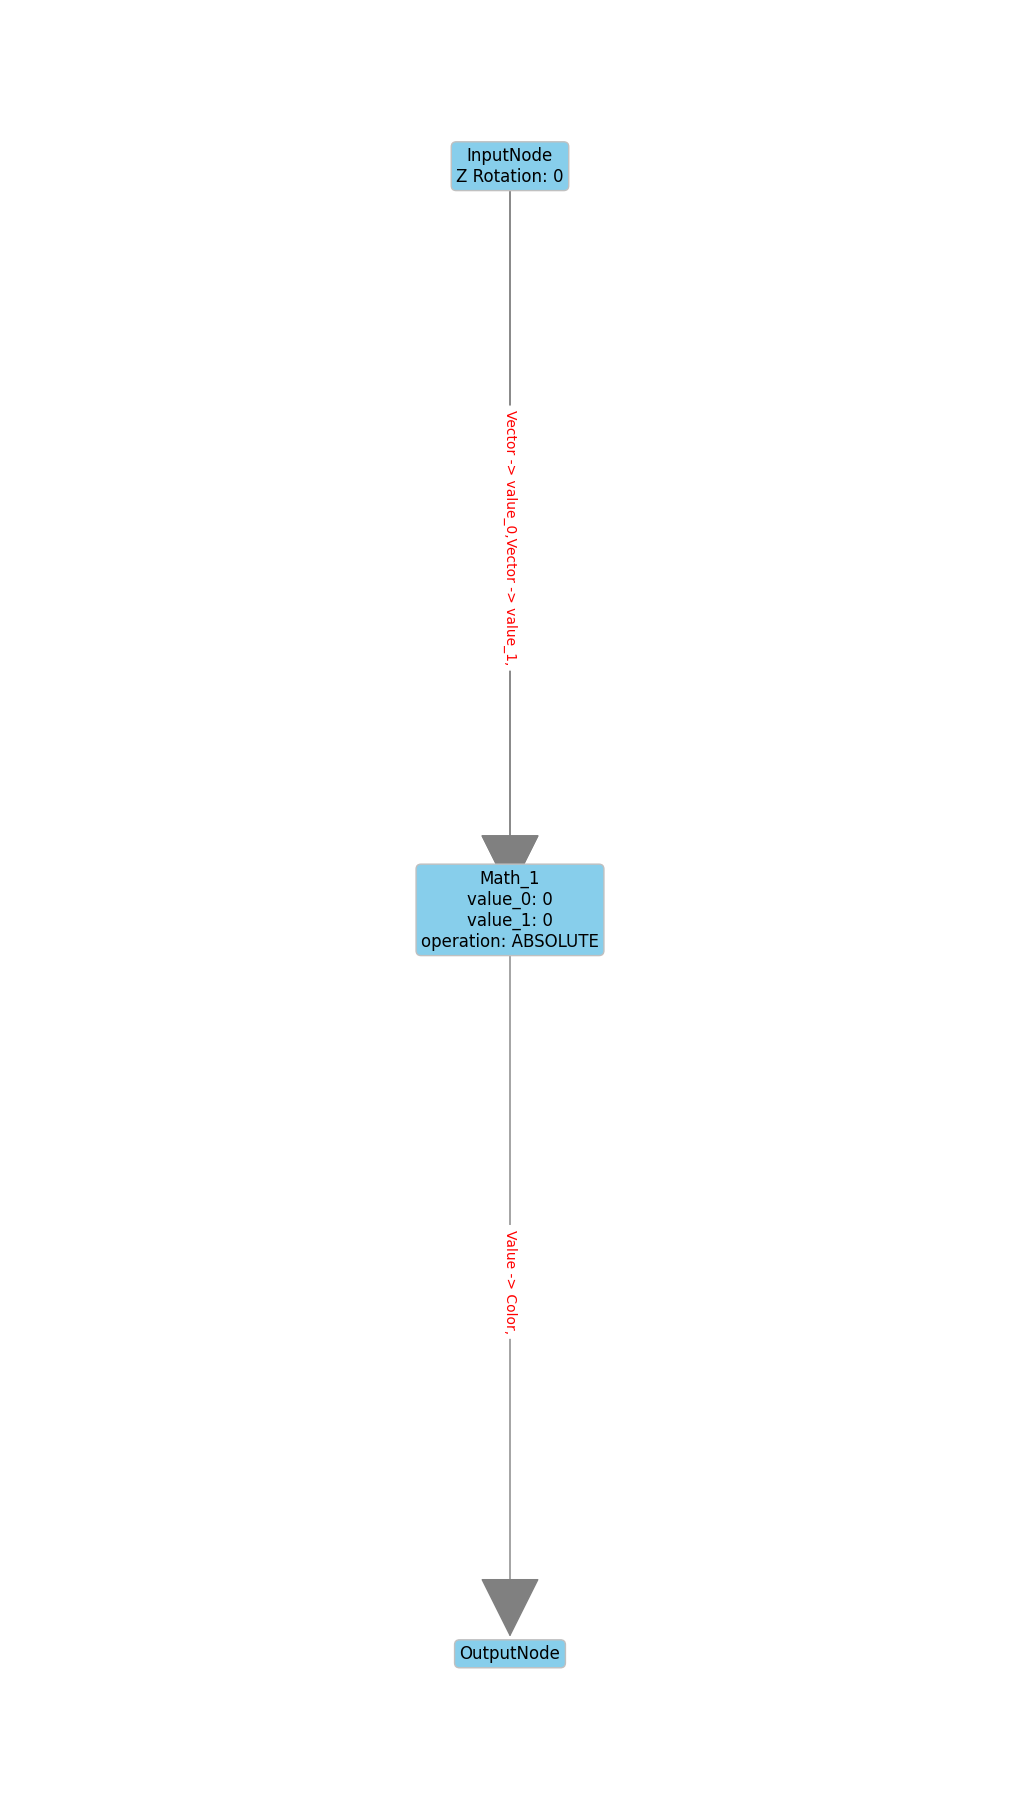

In [11]:
nm.draw_network()

In [55]:
nm = NetworkManager()
nm.initialize_network()
nm.generate_random_network(n_additions=5)

rand_params = nm.get_random_param_values(ParamRequestType.NON_VECTOR_INPUT)
nm.set_nodes_attributes(rand_params)
code = nm.generate_code(with_initialization=True)
clipboard.copy(code)

In [56]:
exec(code)

Info: Deleted 3 data-block(s)


In [57]:
bpy.ops.render.render(write_still=True)

{'FINISHED'}

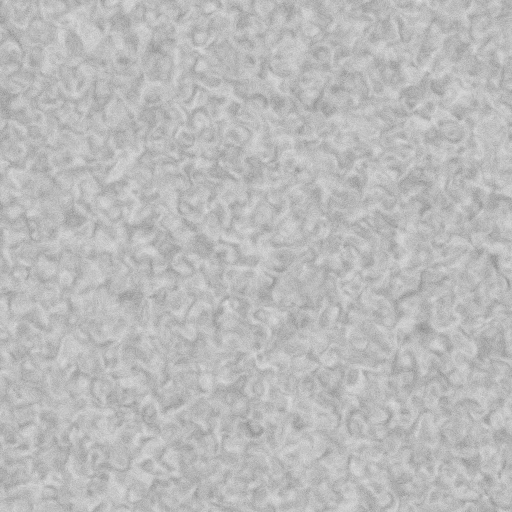

In [58]:
img = Image.open(path) 
img

In [59]:
img_array = np.array(img)

In [60]:
img_array.std()

10.130368248539249